In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating test data set and train dataset same as in the interview question

In [23]:
#data=pd.read_csv('advertising.csv')
#test_data=data.loc[900:1000]
#train_data=data.loc[0:899]
#test_data.to_csv('test_data.csv')
#train_data.to_csv('train_data.csv')

In [78]:
train_data=pd.read_csv('train_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   Daily Time Spent on Site  900 non-null    float64
 2   Age                       900 non-null    int64  
 3   Area Income               900 non-null    float64
 4   Daily Internet Usage      900 non-null    float64
 5   Ad Topic Line             900 non-null    object 
 6   City                      900 non-null    object 
 7   Male                      900 non-null    int64  
 8   Country                   900 non-null    object 
 9   Timestamp                 900 non-null    object 
 10  Clicked on Ad             900 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 77.5+ KB


In [79]:
train_data.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


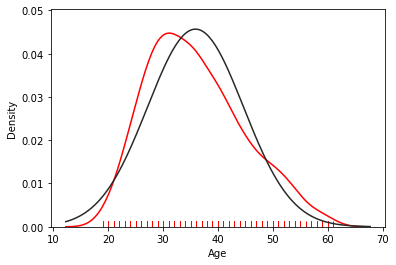

In [80]:
from scipy.stats import norm
sns.distplot(train_data['Age'], hist=False, color='r', rug=True, fit=norm);

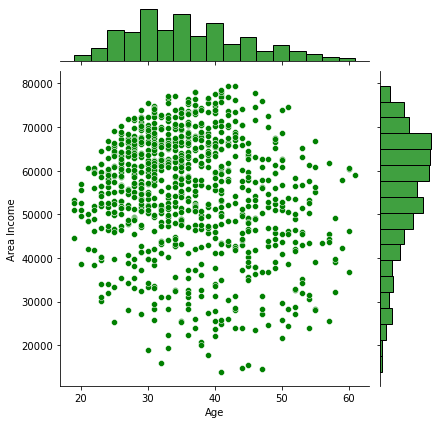

In [148]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= train_data)

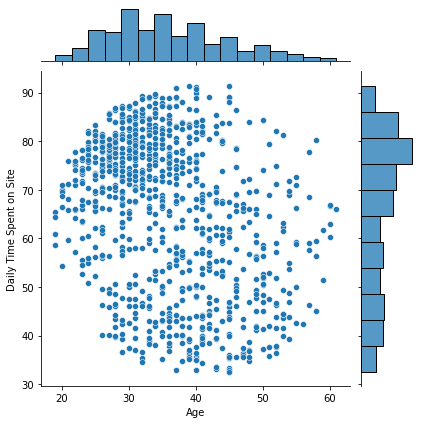

In [153]:

sns.jointplot(x='Age', y='Daily Time Spent on Site', data= train_data);


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


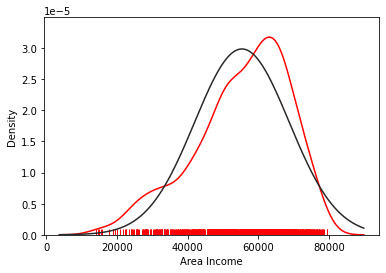

In [81]:
from scipy.stats import norm
sns.distplot(train_data['Area Income'], hist=False, color='r', rug=True, fit=norm);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


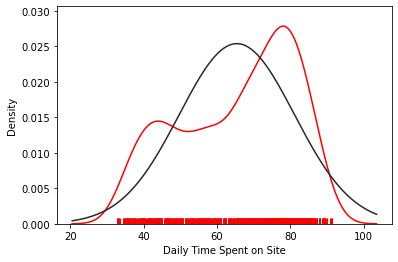

In [82]:
from scipy.stats import norm
sns.distplot(train_data['Daily Time Spent on Site'], hist=False, color='r', rug=True, fit=norm);

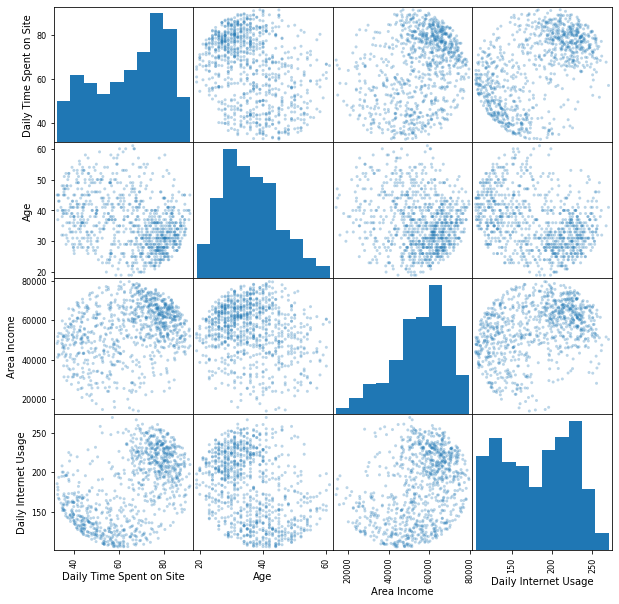

In [83]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10));

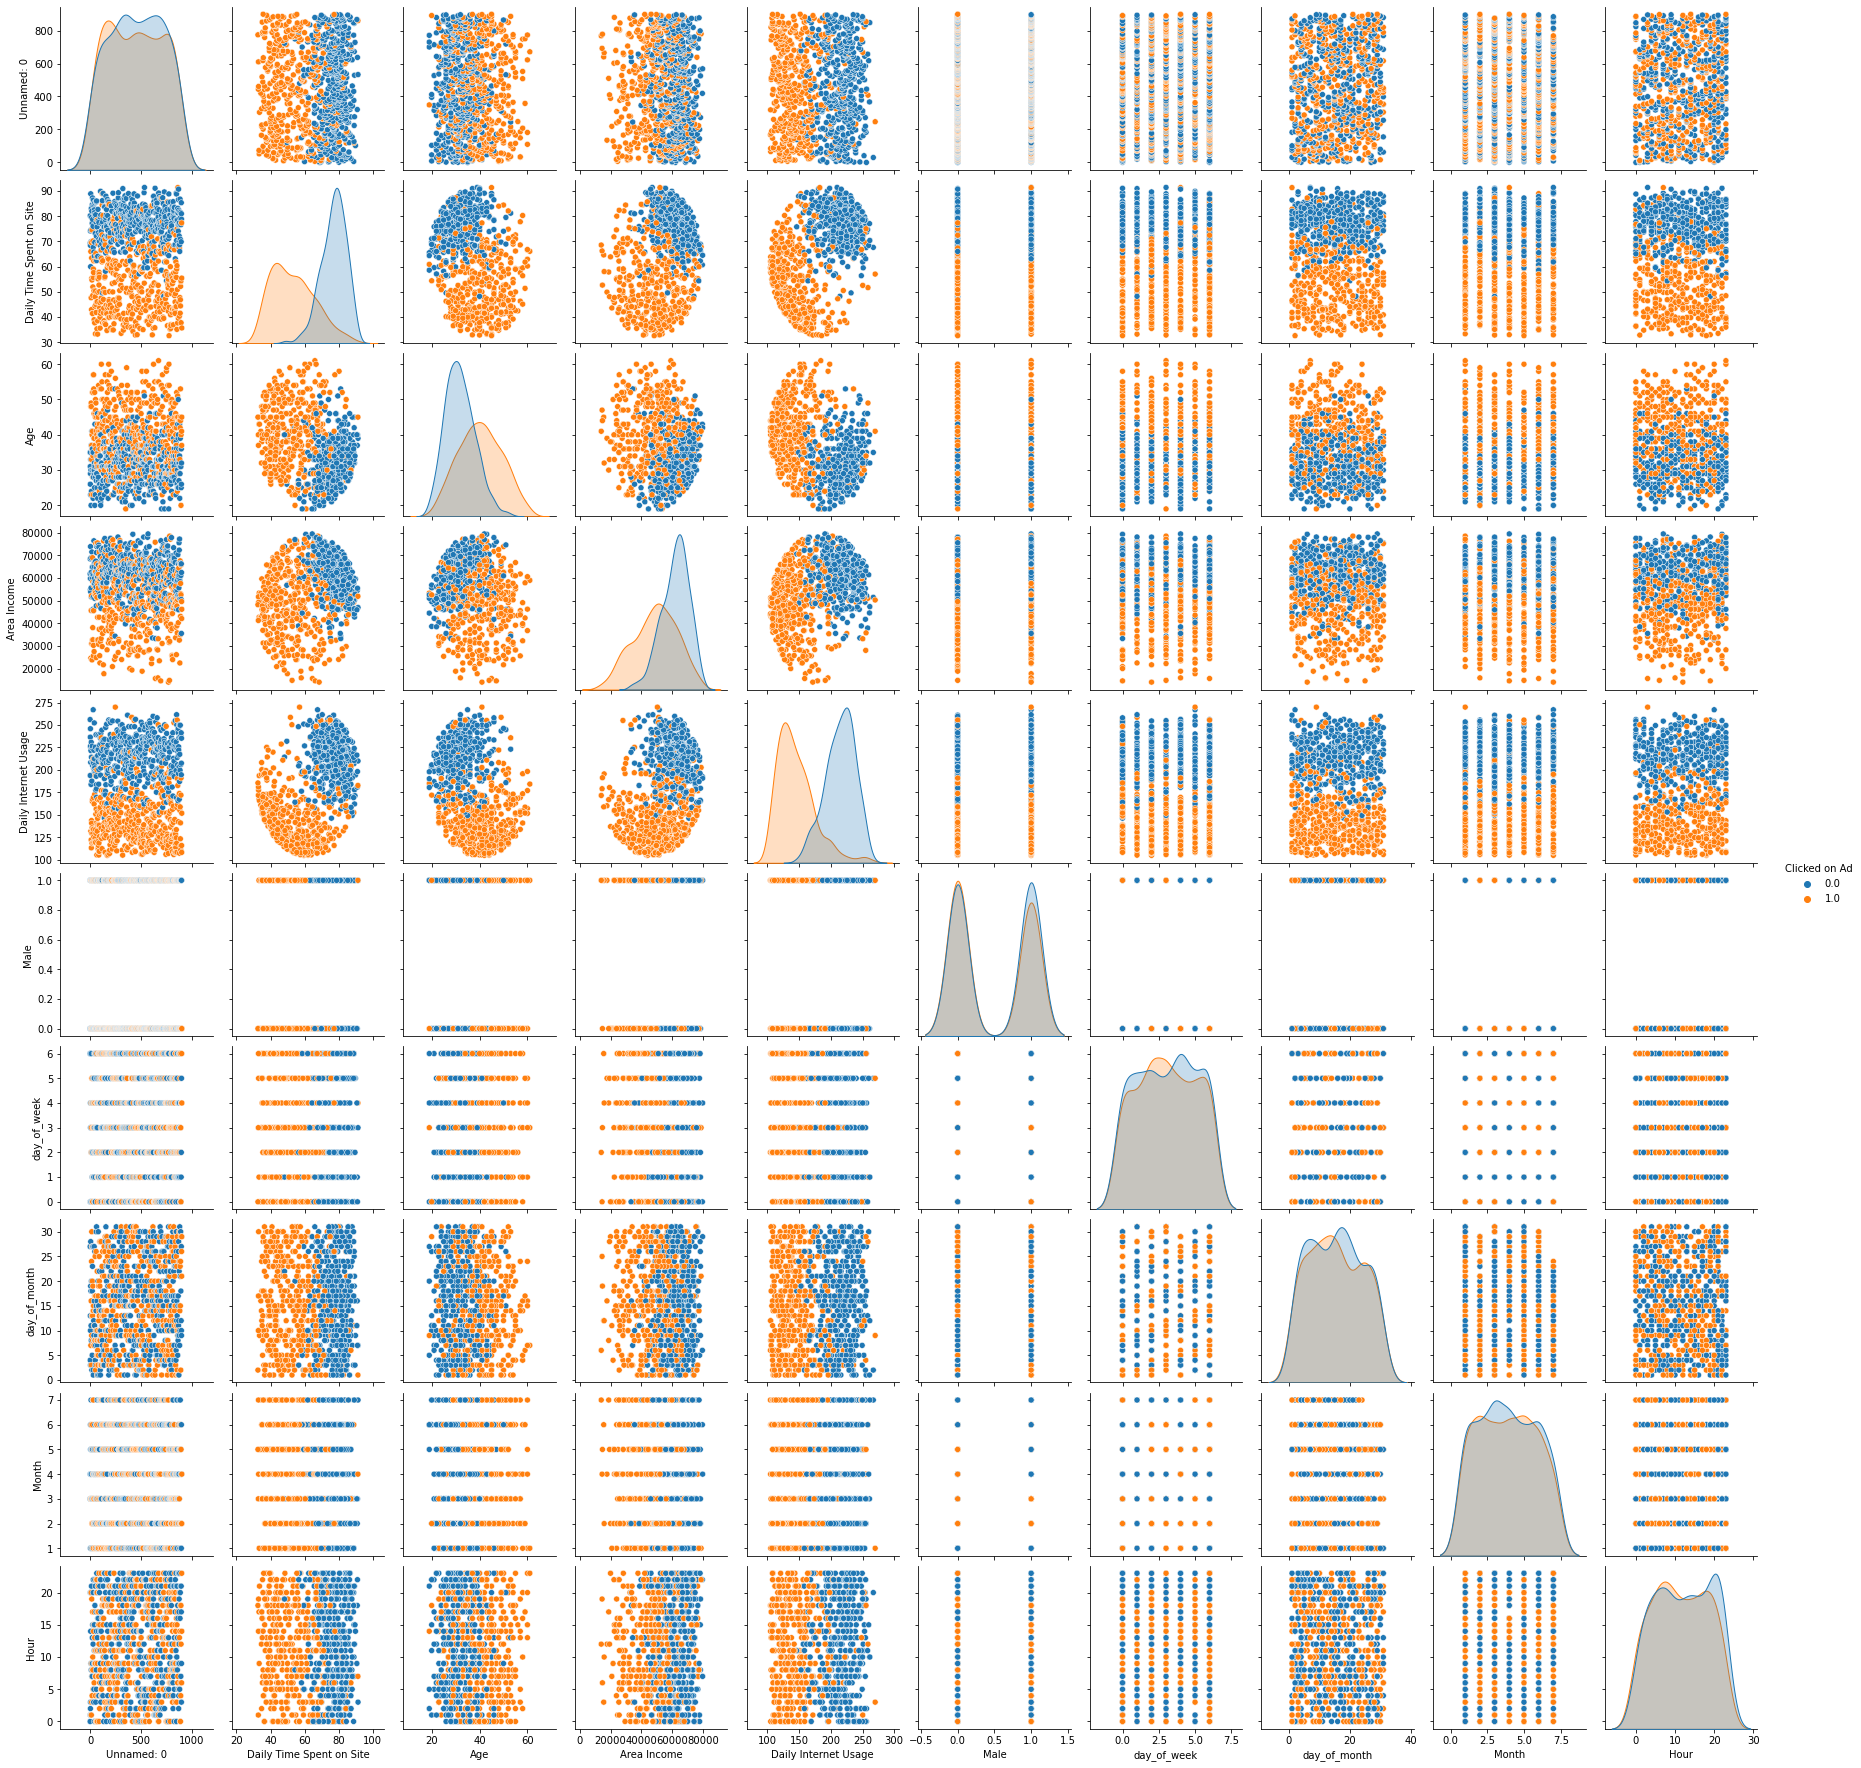

In [152]:
sns.pairplot(train_data, hue='Clicked on Ad');

In [84]:
train_data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0.0
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0.0
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0.0
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0.0
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0.0


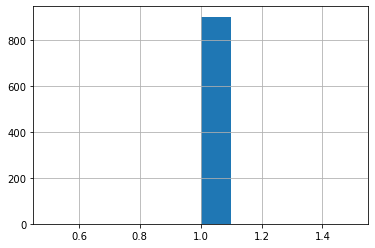

In [85]:
train_data['Ad Topic Line'].value_counts().hist();

<AxesSubplot:>

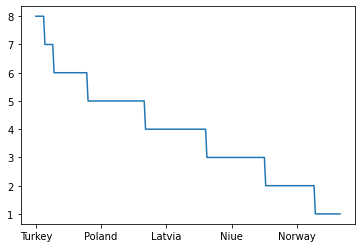

In [86]:
train_data['Country'].value_counts().plot()

In [87]:
object_variables = ['Ad Topic Line', 'City', 'Country']
train_data[object_variables].describe(include=['O'])


,Ad Topic Line,City,Country
count,900,900,900
unique,900,875,234
top,Reverse-engineered dynamic function,Williamsport,Turkey
freq,1,3,8


## From the above looks like for 'Ad Topic Line', 'City'  almost all values are unique
## Country on the other hand does not have as many unique values and values are distributed

In [88]:
train_data=train_data.drop(['Ad Topic Line', 'City','Country'],1)

In [122]:
train_data['Timestamp']=pd.to_datetime(train_data['Timestamp'])
train_data['Month'] = train_data['Timestamp'].dt.month
train_data['day_of_month']=pd.to_datetime(train_data['Timestamp']).dt.day
train_data['day_of_week']=pd.to_datetime(train_data['Timestamp']).dt.dayofweek
train_data['Hour'] = train_data['Timestamp'].dt.hour

train_data = train_data.drop(['Timestamp'], axis=1)

In [124]:
train_data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,day_of_week,day_of_month,Month,Hour
0,0,68.95,35,61833.90,256.09,0,0.0,6,27,3,0
1,1,80.23,31,68441.85,193.77,1,0.0,0,4,4,1
2,2,69.47,26,59785.94,236.50,0,0.0,6,13,3,20
3,3,74.15,29,54806.18,245.89,1,0.0,6,10,1,2
4,4,68.37,35,73889.99,225.58,0,0.0,4,3,6,3
...,...,...,...,...,...,...,...,...,...,...,...
895,895,80.99,26,35521.88,207.53,1,0.0,4,10,6,3
896,896,78.84,32,62430.55,235.29,1,0.0,5,9,4,9
897,897,77.36,41,49597.08,115.79,0,1.0,4,26,2,6
898,898,55.46,37,42078.89,108.10,0,1.0,6,21,2,23


In [125]:
from sklearn.model_selection import train_test_split

X = train_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'day_of_month' ,'day_of_week','Hour']]
y = train_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.9461279461279462

Confusion matrix:
[[136   7]
 [  9 145]]


In [ ]:
#full_pipeline=

Transformations:
1. change timestamp to proper timestamp
2. extract day, dayof month, month, hour from timestamp
3. drop timestamp,city,country and ad topic line 

In [157]:

test_data=pd.read_csv('test_data.csv')

X_test = test_data.drop("Clicked on Ad", axis=1)
y_test = test_data["Clicked on Ad"].copy()
#X_test_prepared = full_pipeline.transform(X_test)

#final_predictions = final_model.predict(X_test_prepared)



In [158]:
y_test

0     1.0
1     1.0
2     1.0
3     0.0
4     0.0
     ... 
95    1.0
96    1.0
97    1.0
98    0.0
99    NaN
Name: Clicked on Ad, Length: 100, dtype: float64